# Data Cleaning and Preprocessing

In [ ]:
import pandas as pd
import glob 

#Load all csv files in the data folder
folder_path = "data"
files = glob.glob(f"{folder_path}/*.csv")

#Load all csv files into a dictionary
dataframes_dict = {}  
for file in files:
    df = pd.read_csv(file, delimiter=';')
    date = file.split('/')[-1].split(' ')[0]
    time = file.split('/')[-1].split(' ')[1].split('.')[0]
    print(f"Loaded file: {file}")
    dataframes_dict[f"{date} {time}"] = df

#Sort the dictionary by key
dataframes_dict = dict(sorted(dataframes_dict.items()))

#Delete unnamed columns
for key in dataframes_dict.keys():
    dataframes_dict[key] = dataframes_dict[key].iloc[:, :-1]

#Print the first 5 rows of the dataframe for sample
df = dataframes_dict["2024-12-25 21-14-46"]
print(df.head())

# Different drive styles between me and dad

In [ ]:
df_father = dataframes_dict["2025-01-01 11-11-18"]
df_me = dataframes_dict["2024-12-01 09-05-00"]

# Assuming the speed data is contained in the column "VALUE" and filtered by "PID" for 'Vehicle speed'
import matplotlib.pyplot as plt

# Filter data for from both dataframes
df_father_speed = df_father[df_father['PID'] == 'Vehicle speed']
df_me_speed = df_me[df_me['PID'] == 'Vehicle speed']

# Normalize seconds to minutes and start from 0 for each dataframe
df_father_speed['SECONDS'] = (df_father_speed['SECONDS'] - df_father_speed['SECONDS'].min()) / 60
df_me_speed['SECONDS'] = (df_me_speed['SECONDS'] - df_me_speed['SECONDS'].min()) / 60

# Extract normalized seconds and speed values for each dataframe
father_minutes = df_father_speed['SECONDS']
father_speed = df_father_speed['VALUE']

me_minutes = df_me_speed['SECONDS']
me_speed = df_me_speed['VALUE']

#Save tha data to a txt file
df_father_speed.to_csv('data/father_speed.txt', sep=';', index=False)
df_me_speed.to_csv('data/me_speed.txt', sep=';', index=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(father_minutes, father_speed, label='Father Speed (GPS)', alpha=0.7)
plt.plot(me_minutes, me_speed, label='My Speed (GPS)', alpha=0.7)

# Add labels, legend, and title
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Filter data for Throttle position from both dataframes
df_father_throttle = df_father[df_father['PID'] == 'Throttle position']
df_me_throttle = df_me[df_me['PID'] == 'Throttle position']

# Normalize seconds to minutes and start from 0 for each dataframe
df_father_throttle['SECONDS'] = (df_father_throttle['SECONDS'] - df_father_throttle['SECONDS'].min()) / 60
df_me_throttle['SECONDS'] = (df_me_throttle['SECONDS'] - df_me_throttle['SECONDS'].min()) / 60

# Extract normalized seconds and throttle position values for each dataframe
father_minutes = df_father_throttle['SECONDS']
father_throttle = df_father_throttle['VALUE']

me_minutes = df_me_throttle['SECONDS']
me_throttle = df_me_throttle['VALUE']

# Save the data to text files
df_father_throttle.to_csv('data/father_throttle.txt', sep=';', index=False)
df_me_throttle.to_csv('data/me_throttle.txt', sep=';', index=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(father_minutes, father_throttle, label='Father Throttle Position', alpha=0.7)
plt.plot(me_minutes, me_throttle, label='My Throttle Position', alpha=0.7)

# Add labels, legend, and title
plt.xlabel('Time (minutes)')
plt.ylabel('Throttle Position (%)')  # Assuming throttle position is in percentage
plt.title('Throttle Position Comparison Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df_father = dataframes_dict["2025-01-01 11-11-18"]
df_me = dataframes_dict["2024-12-01 09-05-00"]

# Define the metrics to compare
metrics = [
    'Throttle position', 'Vehicle acceleration', 
    'Engine RPM', 'Calculated engine load value'
]

# Initialize data storage for plotting and analysis
comparison_data = {}

# Extract, normalize seconds, and prepare for comparison
for metric in metrics:
    df_father_metric = df_father[df_father['PID'] == metric]
    df_me_metric = df_me[df_me['PID'] == metric]
    
    # Normalize seconds to minutes and start from 0
    df_father_metric['SECONDS'] = (df_father_metric['SECONDS'] - df_father_metric['SECONDS'].min()) / 60
    df_me_metric['SECONDS'] = (df_me_metric['SECONDS'] - df_me_metric['SECONDS'].min()) / 60
    
    # Store data for plotting
    comparison_data[metric] = {
        'father': (df_father_metric['SECONDS'], df_father_metric['VALUE']),
        'me': (df_me_metric['SECONDS'], df_me_metric['VALUE']),
    }

# Plot each metric for comparison
for metric, data in comparison_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['father'][0], data['father'][1], label=f"Father's {metric}", alpha=0.7)
    plt.plot(data['me'][0], data['me'][1], label=f"My {metric}", alpha=0.7)
    plt.xlabel('Time (minutes)')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison Over Time')
    plt.legend()
    plt.grid()
    plt.show()

# Statistical Analysis: Calculate and display summary statistics
import pandas as pd

stats = []
for metric, data in comparison_data.items():
    father_values = data['father'][1]
    me_values = data['me'][1]
    stats.append({
        'Metric': metric,
        "Father's Avg": father_values.mean(),
        "My Avg": me_values.mean(),
        "Father's StdDev": father_values.std(),
        "My StdDev": me_values.std(),
        "Father's Max": father_values.max(),
        "My Max": me_values.max(),
    })

# Convert the statistics to a DataFrame and save to a CSV file
stats_df = pd.DataFrame(stats)
stats_df.to_csv("driving_behavior_comparison.csv", index=False)

# Write the values to a each seperate text file for each metric
for metric, data in comparison_data.items():
    df_father_metric = pd.DataFrame({
        'Time (minutes)': data['father'][0],
        f"Father's {metric}": data['father'][1],
    })
    df_me_metric = pd.DataFrame({
        'Time (minutes)': data['me'][0],
        f"My {metric}": data['me'][1],
    })
    df_father_metric.to_csv(f"data/father_{metric}.txt", sep=';', index=False)
    df_me_metric.to_csv(f"data/me_{metric}.txt", sep=';', index=False)

# Display the statistical summary
print(stats_df)

# Fuel Provider Comparison

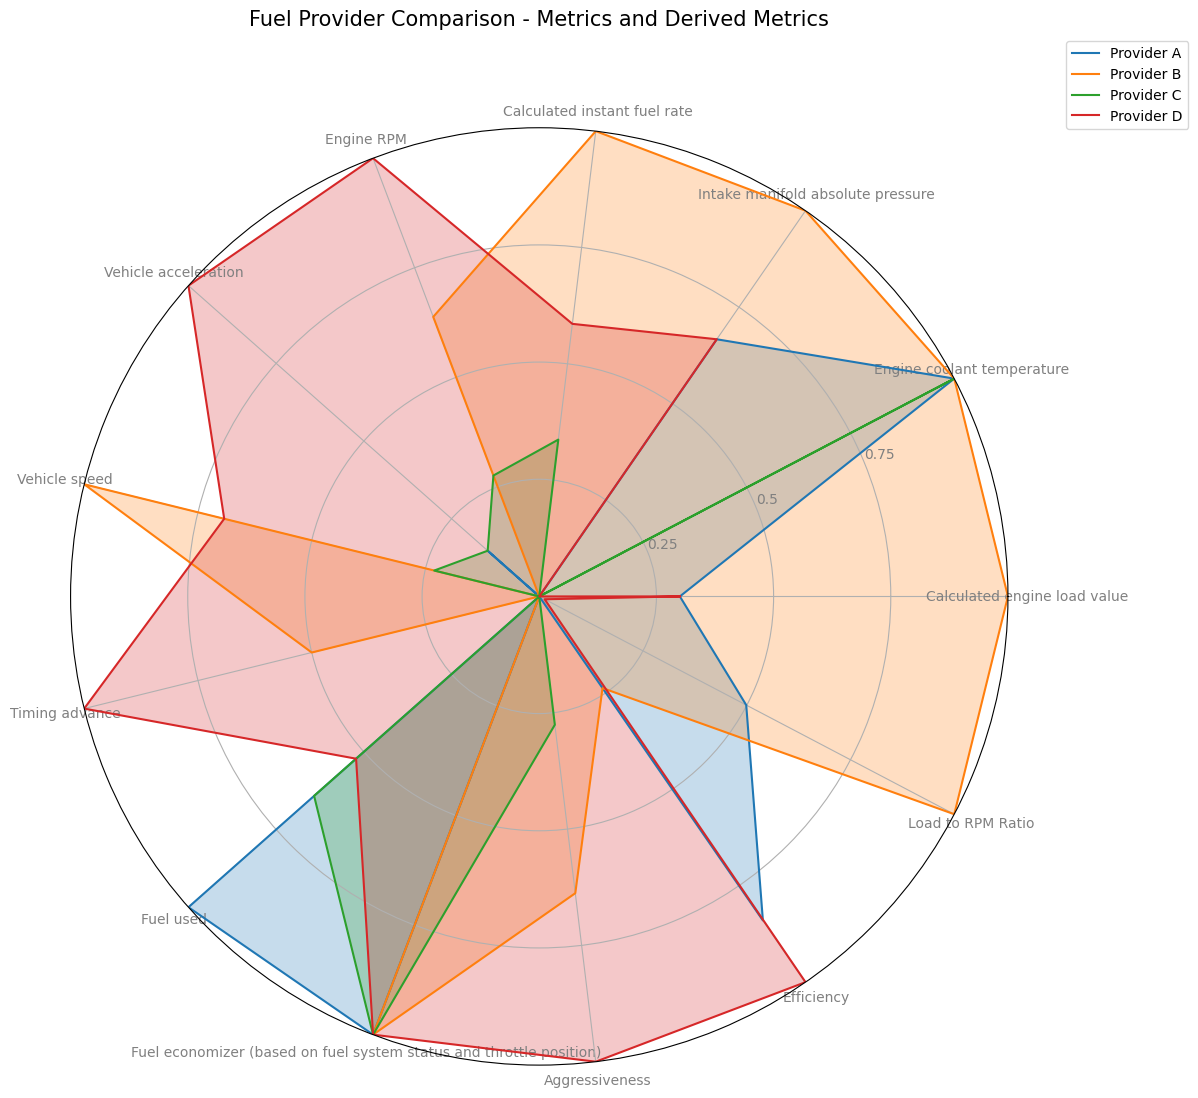

In [9]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Dataframe already loaded in the previous cells

# Load provider keys from the text files
fuel_provider_files = {
    "Provider A": "providers/provider_a.txt",
    "Provider B": "providers/provider_b.txt",
    "Provider C": "providers/provider_c.txt",
    "Provider D": "providers/provider_d.txt"
}

# Map dataframes to providers
provider_data = {}
for provider, txt_file in fuel_provider_files.items():
    with open(txt_file, 'r') as f:
        keys = f.read().splitlines()
        provider_data[provider] = pd.concat([dataframes_dict[key] for key in keys if key in dataframes_dict])

# Metrics to analyze
metrics = [
    'Calculated engine load value', 'Engine coolant temperature', 'Intake manifold absolute pressure', 'Calculated instant fuel rate',
    'Engine RPM','Vehicle acceleration', 'Vehicle speed', 'Timing advance', 'Fuel used', 'Fuel economizer (based on fuel system status and throttle position)'
]

# Derive additional metrics
derived_metrics = {
    'Aggressiveness': lambda df: (
        df[(df['PID'] == 'Absolute throttle position B') & (df['VALUE'] > 0)]['VALUE'].median() +
        df[(df['PID'] == 'Engine RPM') & (df['VALUE'] > 0)]['VALUE'].median() +
        df[(df['PID'] == 'Vehicle acceleration') & (df['VALUE'] > 0)]['VALUE'].median()
    ) / 3,
    'Efficiency': lambda df: (
        df[(df['PID'] == 'Vehicle speed') & (df['VALUE'] > 0)]['VALUE'].median() /
        max(1e-6, df[(df['PID'] == 'Calculated instant fuel rate') & (df['VALUE'] > 0)]['VALUE'].median())
    ),
    'Load to RPM Ratio': lambda df: (
        df[(df['PID'] == 'Calculated engine load value') & (df['VALUE'] > 0)]['VALUE'].median() /
        max(1e-6, df[(df['PID'] == 'Engine RPM') & (df['VALUE'] > 0)]['VALUE'].median())
    )
}

# Log zero values and calculate metrics
radar_data = pd.DataFrame()
for provider, df in provider_data.items():
    provider_metrics = {}
    
    for metric in metrics:
        if metric in df['PID'].unique():
            valid_values = df[(df['PID'] == metric) & (df['VALUE'] > 0)]['VALUE']
            zero_count = len(df[(df['PID'] == metric) & (df['VALUE'] == 0)])
            provider_metrics[metric] = valid_values.median() if not valid_values.empty else 0
        else:
            provider_metrics[metric] = 0
    
    # Add derived metrics
    for derived_metric, func in derived_metrics.items():
        provider_metrics[derived_metric] = func(df)
    
    radar_data = pd.concat([radar_data, pd.DataFrame([provider_metrics], index=[provider])])

# Normalize metrics for radar chart
for col in radar_data.columns:
    if radar_data[col].max() != radar_data[col].min():  # Avoid dividing by zero
        radar_data[col] = (radar_data[col] - radar_data[col].min()) / (radar_data[col].max() - radar_data[col].min())

# Radar chart setup
categories = radar_data.columns
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

plt.figure(figsize=(12, 12))

# Plot each provider
for provider in radar_data.index:
    values = radar_data.loc[provider].values.flatten().tolist()
    values += values[:1]
    plt.polar(angles, values, label=provider)
    plt.fill(angles, values, alpha=0.25)

# Write every data to txt file
radar_data.to_csv('data/fuel_provider_comparison.txt', sep=';', index=True)

# Add labels and legend
plt.xticks(angles[:-1], categories, color='grey', size=10, rotation=90)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10)
plt.ylim(0, 1)
plt.title('Fuel Provider Comparison - Metrics and Derived Metrics', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

# Create a Model to predict 

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import glob

In [11]:
folder_path = "data"
files = glob.glob(f"{folder_path}/*.csv")

dataframes_dict = {}  

for file in files:
    df = pd.read_csv(file, delimiter=';')
    date = file.split('/')[-1].split(' ')[0]
    time = file.split('/')[-1].split(' ')[1].split('.')[0]
    df['TimeStamp'] = f"{date} {time}"  # Create 'TimeStamp' column
    dataframes_dict[f"{date} {time}"] = df

combined_df = pd.concat(dataframes_dict.values(), ignore_index=True)

# Preprocessing: Clean data
cleared_df = combined_df.drop(columns=['Unnamed: 4', "Unnamed: 6", "LATITUDE", "LONGTITUDE", "SECONDS"])
pid_list = [
    'Vehicle speed', 'Engine RPM', 'Engine coolant temperature', 'Throttle position',
    'Intake manifold absolute pressure', 'Timing advance', 'Vehicle acceleration',
    'Calculated engine load value', 'Calculated instant fuel rate', 'Fuel used',
    'Fuel economizer (based on fuel system status and throttle position)'
]
cleared_df = cleared_df[cleared_df['PID'].isin(pid_list)]


In [12]:
# Pivot data for modeling: Convert PID-based structure into feature columns
pivot_df = cleared_df.pivot_table(values='VALUE', index='TimeStamp', columns='PID', aggfunc='mean').reset_index()
pivot_df.dropna(inplace=True)  # Drop rows with missing values

# Feature engineering
pivot_df['Engine RPM x1000'] = pivot_df['Engine RPM'] / 1000
pivot_df['Instant engine power'] = pivot_df['Calculated engine load value'] * pivot_df['Engine RPM'] / 5252

# Define features (X) and target variable (y)
target_variable = 'Calculated instant fuel rate'
features = [col for col in pivot_df.columns if col not in ['TimeStamp', target_variable]]

X = pivot_df[features]
y = pivot_df[target_variable]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance:
Mean Absolute Error (MAE): 0.281700095467111
Root Mean Squared Error (RMSE): 0.40095810517024466
R-squared (R2): 0.7099489148184635


In [15]:
# Hyperparameter tuning (Optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Best R-squared after tuning: {best_r2}")

Best R-squared after tuning: 0.700955107345115


In [16]:
# Feature importance
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                                              Feature  Importance
1                                          Engine RPM    0.234313
10                                   Engine RPM x1000    0.182529
3   Fuel economizer (based on fuel system status a...    0.179918
11                               Instant engine power    0.142124
9                                       Vehicle speed    0.089578
4                                           Fuel used    0.039721
8                                Vehicle acceleration    0.030928
6                                   Throttle position    0.030192
0                        Calculated engine load value    0.025445
5                   Intake manifold absolute pressure    0.022617
7                                      Timing advance    0.014013
2                          Engine coolant temperature    0.008623


In [17]:
# Save the model and scaler
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [18]:
# Predict on new data (example)
def predict_new_data(new_data):
    new_data_df = pd.DataFrame(new_data, columns=features)  # Create DataFrame with feature names
    new_data_scaled = scaler.transform(new_data_df)
    predictions = best_rf.predict(new_data_scaled)
    return predictions

# Example usage
new_data_example = np.array([[60, 2500, 90, 50, 100, 20, 1, 80, 0.5, 10, 5, 80 * 2500 / 5252]])
predictions_example = predict_new_data(new_data_example)
print(f"Predicted instant fuel rate: {predictions_example[0]}")


Predicted instant fuel rate: 3.7529546851857742
